In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# load dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\datasets\worldstat\avocado.csv")

# basic exploration for shape and NaNs
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [53]:
df.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [54]:
df = df.drop(df.columns[:2],1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


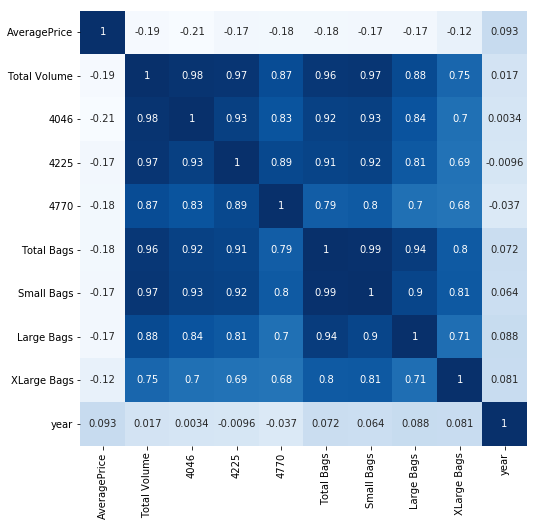

In [55]:
# checkout autocorrelation matrix for redundant data
corr = df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap="Blues", cbar=False, annot=True)
plt.show()

In [56]:
# replace column name so it doesn't get overriden by Python
df.columns = df.columns.str.replace('type','label')

In [57]:
# setup dummy variables for label columns
label = pd.get_dummies(df.label).iloc[:,1:]
year = pd.get_dummies(df.year).iloc[:,1:]
region = pd.get_dummies(df.region).iloc[:,1:]
df = pd.concat([df, label, year, region], 1)
df = df.drop(['label', 'year', 'region'],1)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNetCV

In [59]:
# setup label
X = df.drop('organic', 1)
y = df['organic']

# split data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# classifiers to run and check
classifiers = [['DecTree :',DecisionTreeRegressor()],
               ['RandFor :',RandomForestRegressor()],
               ['KNeighb :', KNeighborsRegressor(n_neighbors = 5)],
               ['SVRegre :', SVR()],
               ['SVClass :', SVC()],
               ['GBClass :', GradientBoostingRegressor()],
               ['ExTRegr :', ExtraTreesRegressor(n_estimators=1, min_samples_split=5)],
               ['ElNetCV :', ElasticNetCV()]]

In [61]:
# print out benchmark functions for classifiers
print("\n====== RMSE ======")
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


====== RMSE ======
DecTree : 0.061932353728533236
RandFor : 0.05837995527646619
KNeighb : 0.210933996038883
SVRegre : 0.35570950169222176
SVClass : 0.36826137233786055
GBClass : 0.08615416733376217
ExTRegr : 0.07413889223926774
ElNetCV : 0.35574780885965024


In [62]:
print("\n====== R^2 ======")
for name,classifier in classifiers:
    print(name, (classifier.score(X_test, y_test)))


====== R^2 ======
DecTree : 0.9846563548964093
RandFor : 0.9863660753508094
KNeighb : 0.8220137167983487
SVRegre : 0.49384409724034206
SVClass : 0.8643835616438356
GBClass : 0.9703075555700571
ExTRegr : 0.9780120085792295
ElNetCV : 0.4937350732032333


In [63]:
# fit a selected classifier
classifier = RandomForestRegressor(n_estimators=1)
classifier.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
# run prediction..
y_pred = classifier.predict(X_test)

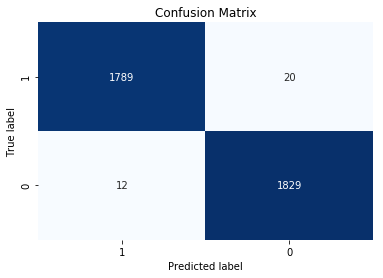

In [65]:
# and plot it in seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
cm_df = pd.DataFrame(cm,
             index = ['1', '0'], 
             columns = ['1', '0'])
ax = sns.heatmap(cm_df, fmt='d', cmap="Blues", cbar=False, annot=True)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
